In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
 
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')
 
# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"
 
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)
 
# Combine the data into a single dataset
combined_data = pd.merge(clinical_trial_data, mouse_drug_data, on="Mouse ID", how = "left")
 
# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
mean_tumor_volume = combined_data.groupby(["Drug","Timepoint"])
mean_tumor_volume = mean_tumor_volume["Tumor Volume (mm3)"].mean()
 
# Convert to DataFrame
mean_tumor_volume = mean_tumor_volume.to_frame()
 
# Preview DataFrame
mean_tumor_volume.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
std_error_tumor_volume = combined_data.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()
 
# Convert to DataFrame
std_error_tumor_volume = std_error_tumor_volume.to_frame()
 
# Preview DataFrame
std_error_tumor_volume.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
# Minor Data Munging to Re-Format the Data Frames
formatted_mean_tumor_volume = mean_tumor_volume.pivot_table(index='Timepoint',columns='Drug', values = "Tumor Volume (mm3)")
 
# Preview that Reformatting worked
formatted_mean_tumor_volume.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


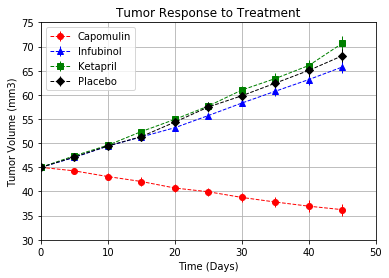

In [5]:
# Generate the Plot (with Error Bars)
x_axis = [0,5,10,15,20,25,30,35,40,45]
x_limit = 45
plt.figure

y1=formatted_mean_tumor_volume["Capomulin"]
y2=formatted_mean_tumor_volume["Infubinol"]
y3=formatted_mean_tumor_volume["Ketapril"]
y4=formatted_mean_tumor_volume["Placebo"]
 
error = std_error_tumor_volume["Tumor Volume (mm3)"]["Capomulin"]
Capomulin = plt.errorbar(x_axis, y1, yerr=error, fmt="o", linewidth=1, ls = "dashed", alpha=1, color ="red")
 
error = std_error_tumor_volume["Tumor Volume (mm3)"]["Infubinol"]
Infubinol = plt.errorbar(x_axis, y2, yerr=error, fmt="^", linewidth=1, ls = "dashed", alpha=1, color ="blue")
 
error = std_error_tumor_volume["Tumor Volume (mm3)"]["Ketapril"]
Ketapril = plt.errorbar(x_axis, y3, yerr=error, fmt="s", linewidth=1, ls = "dashed", alpha=1, color = "green")
 
error = std_error_tumor_volume["Tumor Volume (mm3)"]["Placebo"]
Placebo = plt.errorbar(x_axis, y4, yerr=error, fmt="D", linewidth=1,ls = "dashed", alpha=1, color = "black")
 
plt.xlim(0, 50)
plt.ylim(30, 75)
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(linestyle="solid")
plt.legend((Capomulin, Infubinol, Ketapril, Placebo), ("Capomulin", "Infubinol", "Ketapril", "Placebo"))
 
# Save the Figure
plt.savefig('output/Tumor_Response_to_Treatment.png')
# Show the Figure
plt.show()

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint
mean_met_site= combined_data.groupby(['Drug', 'Timepoint'])["Metastatic Sites"].mean()
 
# Convert to DataFrame
mean_met_site = mean_met_site.to_frame()
 
# Preview DataFrame
mean_met_site.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint
std_error_met_site= combined_data.groupby(['Drug', 'Timepoint'])["Metastatic Sites"].sem()

# Convert to DataFrame
std_error_met_site = std_error_met_site.to_frame()

# Preview DataFrame
std_error_met_site.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [8]:
# Minor Data Munging to Re-Format the Data Frames
formatted_mean_met_site = mean_met_site.pivot_table(index='Timepoint',columns='Drug',values='Metastatic Sites')
 
# Preview that Reformatting worked
formatted_mean_met_site.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


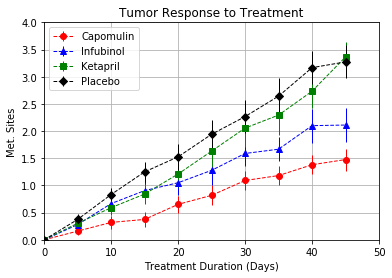

In [9]:
# Generate the Plot (with Error Bars)
x_axis = [0,5,10,15,20,25,30,35,40,45]
x_limit = 45
plt.figure

y1=formatted_mean_met_site["Capomulin"]
y2=formatted_mean_met_site["Infubinol"]
y3=formatted_mean_met_site["Ketapril"]
y4=formatted_mean_met_site["Placebo"]

error = std_error_met_site["Metastatic Sites"]["Capomulin"]
Capomulin = plt.errorbar(x_axis, y1, yerr=error, fmt="o", linewidth=1, ls = "dashed", alpha=1, color ="red")
 
error = std_error_met_site["Metastatic Sites"]["Infubinol"]
Infubinol = plt.errorbar(x_axis, y2, yerr=error, fmt="^", linewidth=1, ls = "dashed", alpha=1, color ="blue")
 
error = std_error_met_site["Metastatic Sites"]["Ketapril"]
Ketapril = plt.errorbar(x_axis, y3, yerr=error, fmt="s", linewidth=1, ls = "dashed", alpha=1, color = "green")
 
error = std_error_met_site["Metastatic Sites"]["Placebo"]
Placebo = plt.errorbar(x_axis, y4, yerr=error, fmt="D", linewidth=1,ls = "dashed", alpha=1, color = "black")
 
plt.xlim(0, 50)
plt.ylim(0, 4)
plt.title("Tumor Response to Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.grid(linestyle="solid")
plt.legend((Capomulin, Infubinol, Ketapril, Placebo), ("Capomulin", "Infubinol", "Ketapril", "Placebo"))
 
# Save the Figure
plt.savefig('output/Metastatic_Spread_During_Treatment.png')
# Show the Figure
plt.show()

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_mice = combined_data.groupby(['Drug', 'Timepoint'])['Mouse ID'].count()
 
# Convert to DataFrame
count_mice = count_mice.to_frame()
count_mice = count_mice.rename(columns = {"Mouse ID": "Mouse Count"})
 
# Preview DataFrame
count_mice.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [11]:
# Minor Data Munging to Re-Format the Data Frames
formatted_count_mice = count_mice.pivot_table(index='Timepoint', columns='Drug')["Mouse Count"]
# Preview the Data Frame
formatted_count_mice.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


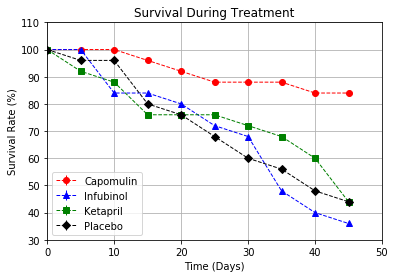

In [14]:
# Generate the Plot (with Error Bars)
x_axis = [0,5,10,15,20,25,30,35,40,45]
x_limit = 45
plt.figure
 
y1=(formatted_count_mice["Capomulin"]/25*100)
y2=(formatted_count_mice["Infubinol"]/25*100)
y3=(formatted_count_mice["Ketapril"]/25*100)
y4=(formatted_count_mice["Placebo"]/25*100)
    
Capomulin = plt.errorbar(x_axis, y1, yerr=error, fmt="o", linewidth=1, ls = "dashed", alpha=1, color ="red")
Infubinol = plt.errorbar(x_axis, y2, yerr=error, fmt="^", linewidth=1, ls = "dashed", alpha=1, color ="blue")
Ketapril = plt.errorbar(x_axis, y3, yerr=error, fmt="s", linewidth=1, ls = "dashed", alpha=1, color = "green")
Placebo = plt.errorbar(x_axis, y4, yerr=error, fmt="D", linewidth=1,ls = "dashed", alpha=1, color = "black")
 
plt.xlim(0, 50)
plt.ylim(30, 110)
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
 
plt.grid(linestyle="solid")
plt.legend((Capomulin, Infubinol, Ketapril, Placebo), ("Capomulin", "Infubinol", "Ketapril", "Placebo"))
 
# Save the Figure
plt.savefig('output/Survival_During_Treatment.png')
# Show the Figure
plt.show()

In [15]:
# Calculate the percent changes for each drug
percent_change=(formatted_mean_tumor_volume.iloc[-1,:]-formatted_mean_tumor_volume.iloc[0,:])/formatted_mean_tumor_volume.iloc[0,:]*100
# Display the data to confirm
percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

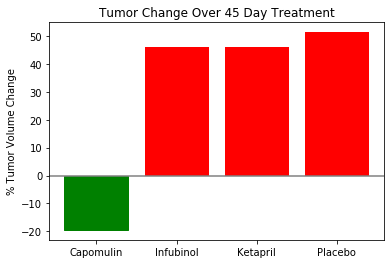

In [16]:
# Store all Relevant Percent Changes into a Tuple
# Splice the data between passing and failing drugs
# Orient widths. Add labels, tick marks, etc.
# Use functions to label the percentages of changes
# Call functions to implement the function calls
 
drug = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
tumor_growth = [-19.475303, 46.123472, 46.123472, 51.297960]
 
x_axis = np.arange(len(tumor_growth))
plt.axhline(0, color="grey")
plt.ylabel("Drug")
plt.ylabel("% Tumor Volume Change")
plt.title("Tumor Change Over 45 Day Treatment")
bar_graph = plt.bar(drug, tumor_growth, facecolor = "r", align="center")
bar_graph[0].set_color('g')
plt.grid(axis= "both", which = "minor")
 
# Save the Figure
plt.savefig('output/Tumor_Change_Over_45_Day_Treatment.png')
# Show the Figure
plt.show()

## Observations

1: Of all of the drugs, Capomulin seemed to yeild the highest survival rates in mice over a 45 day treatment period.\
\
2: Of all of the drugs, Capomulin seemed to decrease the volume of the cancer in mice over a 45 day treatment period.\
\
3: When looking at all drug effectiveness overall, the Placebo had better results than certain drugs. This further supports the claim of the Placebo Effect in the scientific feild. 